In [36]:
# import the packages
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

In [37]:
# read the data in a dataframe
df = pd.read_csv('TSLA.csv')
print(df.shape)
df.head()

(3322, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [38]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3317,2023-09-01,257.260010,259.079987,242.009995,245.009995,245.009995,132272500
3318,2023-09-05,245.000000,258.000000,244.860001,256.489990,256.489990,129469600
3319,2023-09-06,255.139999,255.389999,245.059998,251.919998,251.919998,116959800
3320,2023-09-07,245.070007,252.809998,243.270004,251.490005,251.490005,115312900
3321,2023-09-08,251.220001,256.519989,246.669998,248.500000,248.500000,118367700


<Axes: >

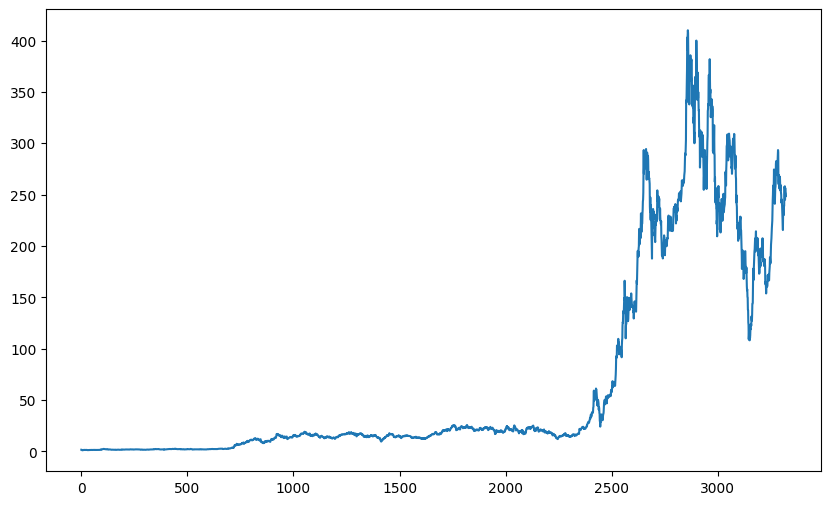

In [39]:
df['Close'].plot()

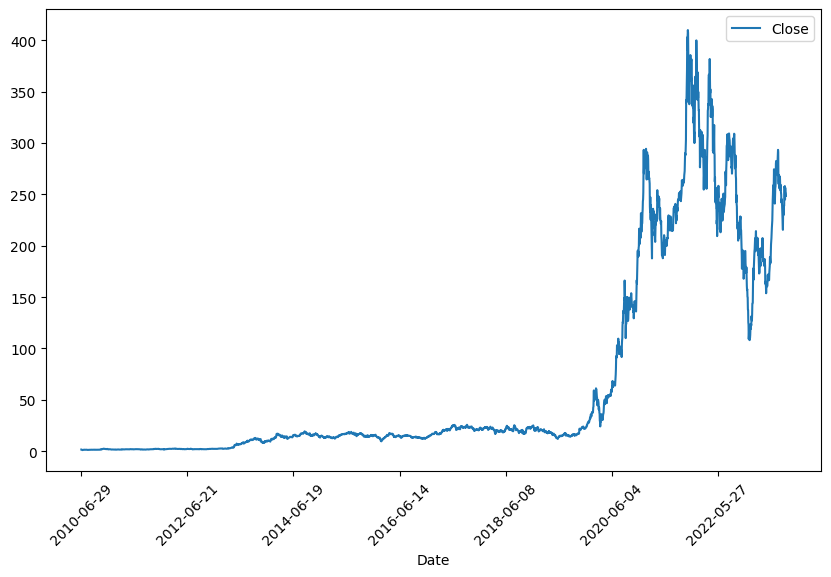

In [40]:
df.plot(x = 'Date', y = 'Close')
plt.xticks(rotation = 45)
plt.show()

In [41]:
# do the statistical test for time series stationarity check
result = adfuller(df['Close'])

In [42]:
# 두번째 인자 값은 p-value이다.
print(result[0], result[1]) # higher negative value of test statistic -> stationary
# p-value가 0.05보다 크기 때문에 귀무가설을 기각할 수 없다.  -> 단위근이 있다. -> 정상성이지 않다.

-0.7975450613345594 0.8198421238604765


In [43]:
# make the time series stationary
# 로그로 만들기
df['log_close'] = np.log(df['Close'])

In [44]:
result = adfuller(df['log_close'])

In [45]:
print(result[0], result[1])
# p-value가 0.05보다 크기 때문에 아직 정상성이지 않다.

-0.6218520831867786 0.8659675105845354


In [46]:
df['diff_log_close'] = df['log_close'].diff()
df.dropna(inplace=True)

In [47]:
result = adfuller(df['diff_log_close'])

In [48]:
print(result[0], result[1])
# 정상성임을 나타내는 negative value가 -57.79이며, p-value가 0.0이므로 귀무가설을 채택하여 정상성임을 보임을 확인했다.

-57.79839710448467 0.0


In [49]:
TSLA = df[['Date', 'log_close']]
TSLA['diff_log_close'] = TSLA['log_close'].diff().dropna()
TSLA_diff = TSLA[['Date', 'diff_log_close']]
TSLA.drop('diff_log_close', axis = 1, inplace=True)
TSLA.set_index('Date', inplace=True)
TSLA_diff.set_index('Date', inplace=True)
TSLA_diff.dropna(inplace=True)
TSLA_diff

<ipython-input-49-7434f6d59af8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSLA['diff_log_close'] = TSLA['log_close'].diff().dropna()
<ipython-input-49-7434f6d59af8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSLA.drop('diff_log_close', axis = 1, inplace=True)
<ipython-input-49-7434f6d59af8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSLA_diff.dropna(inplace=Tru

,diff_log_close
Date,
2010-07-01,-0.081723
2010-07-02,-0.134312
2010-07-06,-0.175470
2010-07-07,-0.019431
2010-07-08,0.099903
...,...
2023-09-01,-0.051971
2023-09-05,0.045791
2023-09-06,-0.017978


In [50]:
# ARMA model - I =0, p = order of the AR part, q = moving average model
arma = SARIMAX(TSLA_diff, order = (2, 0 ,2))
# (p, I, q)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [51]:
arma_results = arma.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [52]:
# AIC: Akaike information criterion
# BIC: Bayesian information criterion
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:         diff_log_close   No. Observations:                 3320
Model:               SARIMAX(2, 0, 2)   Log Likelihood                6335.080
Date:                Sun, 10 Sep 2023   AIC                         -12660.160
Time:                        05:54:29   BIC                         -12629.622
Sample:                             0   HQIC                        -12649.232
                               - 3320                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0008      1.506     -0.001      1.000      -2.953       2.951
ar.L2          0.0047      1.468      0.003      0.997      -2.872       2.881
ma.L1         -0.0009      1.508     -0.001      1.0

In [54]:
# make a forecast using the fitted model
# 예측 평균을 구한다.
# 여기서 구한 값을 차분과 관계가 있다. -> 실제 값으로 돌아가야 하며 이를 위해 누적 합계를 취해야한다.
arma_diff_forecast = arma_results.get_forecast(steps = 30).predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [62]:
arma_int_forecast = np.cumsum(arma_diff_forecast)

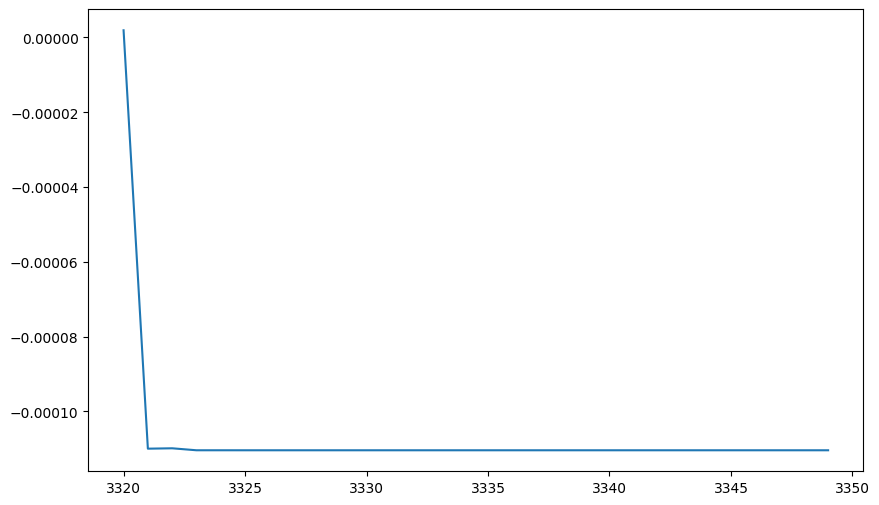

In [67]:
plt.plot(arma_int_forecast)

In [66]:
arma_value_forecast = arma_int_forecast + df[['Close']].iloc[-1,0]

In [ ]:
print(arma_value_forecast)